In [339]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [340]:
df=pd.read_csv(r"C:\Users\sunil\Downloads\Copper_Set.xlsx - Result 1.csv")
df


C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\2571887819.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\sunil\Downloads\Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [341]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [342]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [343]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [344]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame

# # Iterate over columns of the DataFrame
# for col in df.columns:
#     # Create a histogram for each column
#     sns.histplot(x=df[col], kde=True)
#     plt.title(f'Histogram of {col}')
#     plt.xlabel('Values')
#     plt.ylabel('Frequency')
#     plt.show()


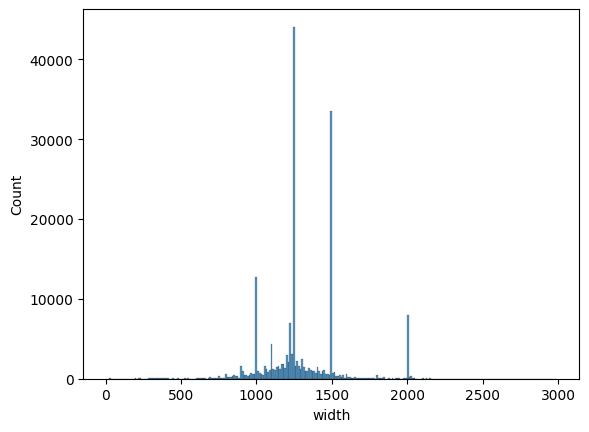

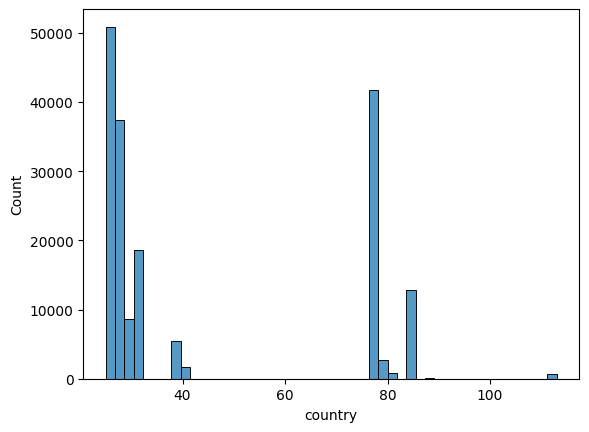

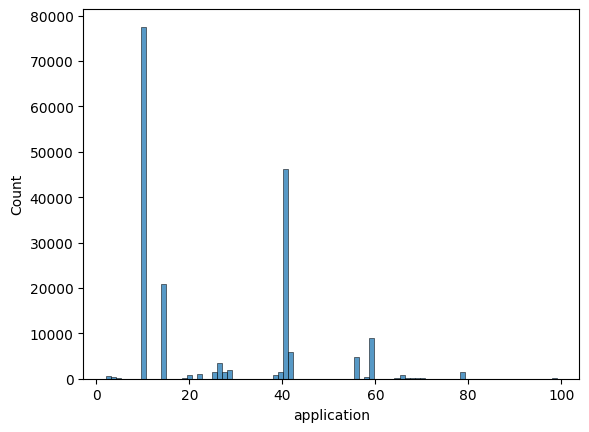

In [345]:

sns.histplot(x=df["width"])
plt.show()

sns.histplot(x=df["country"])
plt.show()

sns.histplot(x=df["application"])
plt.show()

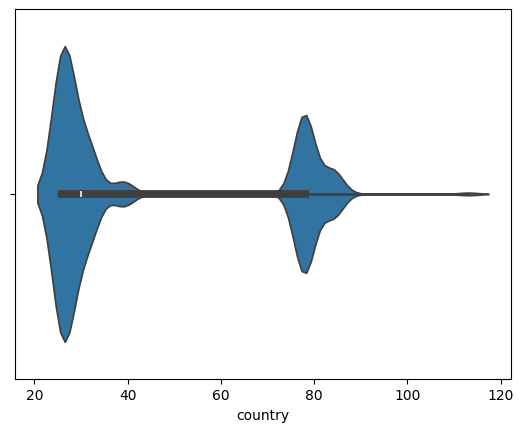

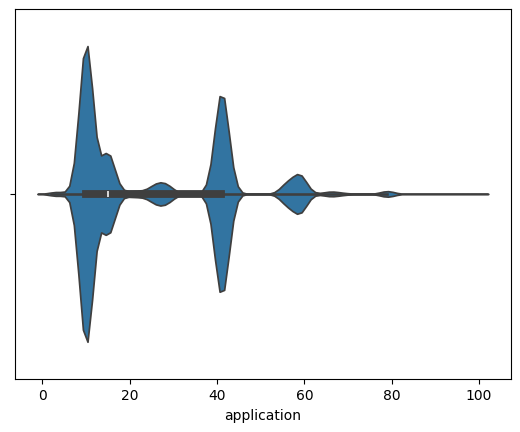

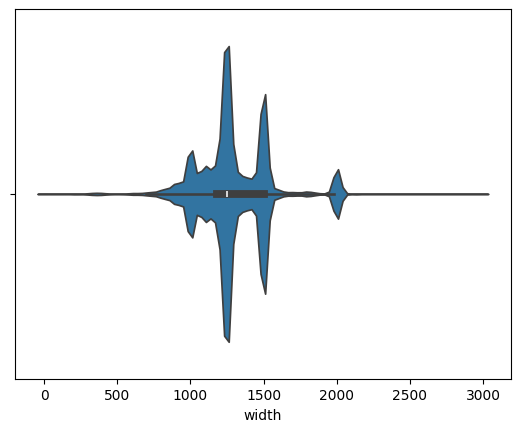

In [346]:
sns.violinplot(x=df["country"])
plt.show()

sns.violinplot(x=df["application"])
plt.show()

sns.violinplot(x=df["width"])
plt.show()

In [347]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


(181673, 14)

In [348]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [349]:
df["material_ref"].fillna("unknown",inplace=True)

In [350]:
df.isna().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [351]:
#checking fake values in selling price and quantity tons
condition = (df["selling_price"] <= 0) | (df["selling_price"] == "")
df.loc[condition, "selling_price"] = np.NaN


condition = (df["quantity tons"] <= 0) | (df["quantity tons"] == "")
df.loc[condition, "quantity tons"] = np.NaN

In [352]:
def check(df,columns):
    condition=(df[columns]=="")|(df[columns]==" ")
    df.loc[condition,columns]=np.NaN

In [353]:
check(df,"item_date")
check(df,"customer")
check(df,"country")
check(df,"status")
check(df,"application")
check(df,"thickness")
check(df,"delivery date")
check(df,"selling_price")

In [354]:
df.isna().sum()

id                2
item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

In [355]:
df=df.dropna()

In [356]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [357]:
#outlier handling using iqr method
# def outlier(df,column):
#     iqr=df[column].quantile(0.75)-df[column].quantile(0.25)
#     upper_threshold=df[column].quantile(0.75) + (1.5*iqr)
#     lower_threshold=df[column].quantile(0.25) + (1.5*iqr)
#     df[column]=df[column].clip(lower_threshold,upper_threshold)

In [358]:
# outlier(df, 'quantity tons')
# outlier(df, 'thickness')
# outlier(df, 'selling_price')
# outlier(df, 'width')
# outlier(df,"application")

C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price_log'] = np.log(df['selling_price'])
C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price_log'])


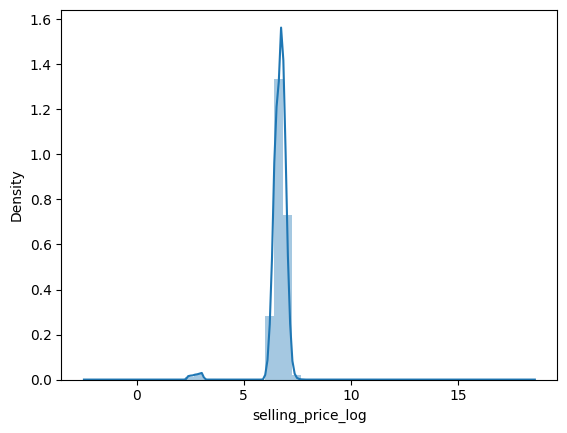

C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity tons_log'] = np.log(df['quantity tons'])
C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity tons_log'])


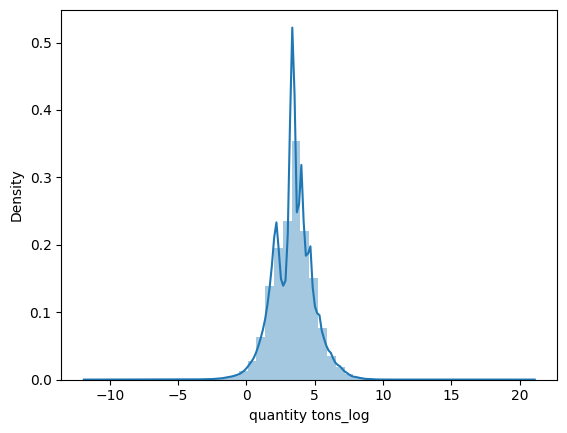

C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thickness_log'] = np.log(df['thickness'])
C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\1793707980.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thickness_log'])


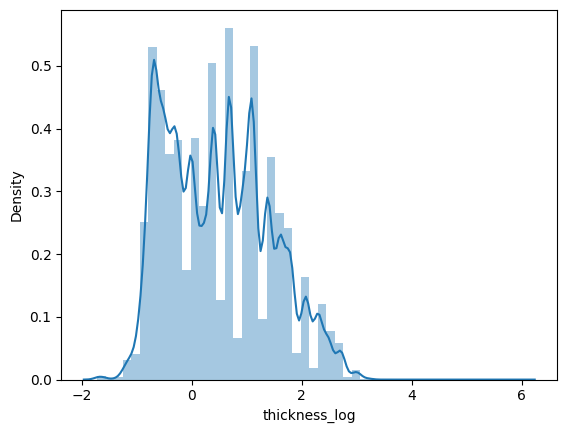

In [359]:
#loging the needed columns

df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()

In [360]:
df.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

In [361]:
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# con=LabelEncoder()
con=OrdinalEncoder()

df.status=con.fit_transform(df[["status"]])

df['item type']=con.fit_transform(df[['item type']])


C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\464534564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.status=con.fit_transform(df[["status"]])
C:\Users\sunil\AppData\Local\Temp\ipykernel_3176\464534564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item type']=con.fit_transform(df[['item type']])


In [362]:
df.status.unique()

array([7., 0., 6., 1., 2., 8., 5., 4., 3.])

In [363]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

<Axes: xlabel='selling_price_log', ylabel='Count'>

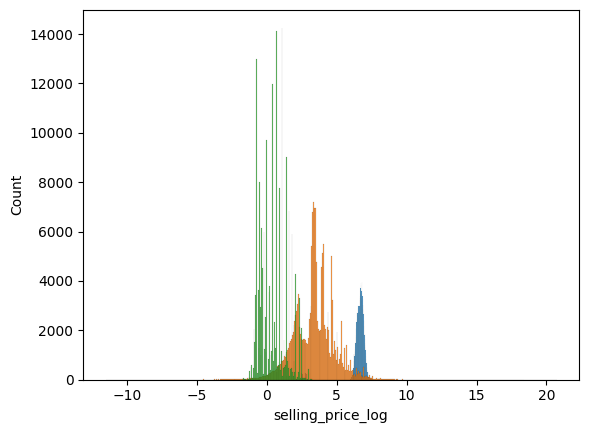

In [364]:
sns.histplot(df["selling_price_log"])
# plt.show()
sns.histplot(df["quantity tons_log"])
# plt.show()
sns.histplot(df["thickness_log"])
# plt.show()

In [365]:
df.to_csv("coopermodel.csv",index=False)

In [366]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [367]:
X=df[["quantity tons_log","country",'status','thickness_log','width','product_ref',"customer",'item type',"application"]]

In [368]:
min(df["thickness"])

0.18

In [369]:
max(df["quantity tons"])

1000000000.0

In [370]:
y=df["selling_price_log"]

In [371]:
X

,quantity tons_log,country,status,thickness_log,width,product_ref,customer,item type,application
0,3.991779,28.0,7.0,0.693147,1500.0,1670798778,30156308.0,5.0,10.0
1,6.643822,25.0,7.0,-0.223144,1210.0,1668701718,30202938.0,5.0,41.0
2,5.956169,30.0,7.0,-0.967584,952.0,628377,30153963.0,6.0,28.0
3,5.310301,32.0,7.0,0.832909,1317.0,1668701718,30349574.0,3.0,59.0
4,6.666354,28.0,7.0,1.386294,2000.0,640665,30211560.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...
181667,4.670802,25.0,7.0,-0.040822,1240.0,164141591,30200854.0,5.0,41.0
181668,4.629691,25.0,7.0,-0.040822,1220.0,164141591,30200854.0,5.0,41.0
181669,5.337954,25.0,7.0,-0.051293,1500.0,164141591,30200854.0,5.0,41.0
181670,1.443523,25.0,7.0,-0.342490,1250.0,164141591,30200854.0,5.0,41.0


In [372]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181667    6.400257
181668    6.381816
181669    6.378426
181670    6.428105
181672    6.408529
Name: selling_price_log, Length: 181620, dtype: float64

In [373]:
print(min(df["product_ref"]))
print(max(df["product_ref"]))

611728
1722207579


<Axes: >

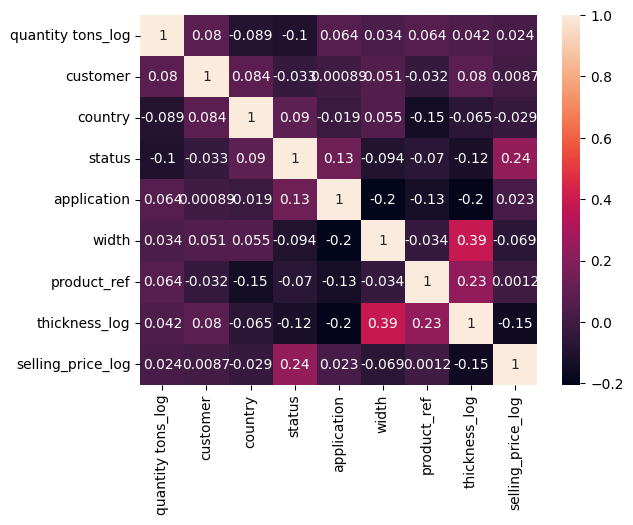

In [374]:
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [380]:
from sklearn.preprocessing import StandardScaler
condition=StandardScaler()
X=condition.fit_transform(X)





In [381]:
display(X)

array([[ 0.41506739, -0.69225033,  0.70620108, ..., -0.75771563,
         0.82144631, -0.87956189],
       [ 2.25042993, -0.81517858,  0.70620108, ..., -0.29403459,
         0.82144631,  0.8665426 ],
       [ 1.77453529, -0.61029817,  0.70620108, ..., -0.78103392,
         1.76911846,  0.13430523],
       ...,
       [ 1.34669579, -0.81517858,  0.70620108, ..., -0.31475754,
         0.82144631,  0.8665426 ],
       [-1.34846834, -0.81517858,  0.70620108, ..., -0.31475754,
         0.82144631,  0.8665426 ],
       [ 1.81043496, -0.81517858,  0.70620108, ..., -0.31475754,
         0.82144631,  0.8665426 ]])

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [197]:
#regression

In [198]:
from sklearn.linear_model import LinearRegression
linearR=LinearRegression()
u=linearR.fit(X_train,y_train)
print(linearR.score(X_train,y_train))
print(linearR.score(X_test,y_test))
print(u.predict(X_test))

0.08464529095644646
0.07805457019653694
[6.338457   6.58376421 6.61775775 ... 6.66961384 6.6512259  6.42888993]


In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
model = grid_search.best_estimator_

y_pred_test = model.predict(X_test)

y_pred_train=model.predict(X_train)

Train_score=metrics.r2_score(y_pred_train,y_train)
print("Train Score is",Train_score)

Test_score=metrics.r2_score(y_pred_test,y_test)
print("Test Score is",Test_score)



Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Score is 0.9463687942960616
Test Score is 0.9163446029277104


In [200]:
#Mean absolute error
metrics.mean_absolute_error(y_test,y_pred_test)

0.11681602398226244

In [201]:
# Mean square error
metrics.mean_squared_error(y_pred_test,y_test)

0.025973589177686482

In [202]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor()
etr.fit(X_train,y_train)
y_pred_train=etr.predict(X_train)
y_pred_test=etr.predict(X_test)
# print(metrics.r2_score(y_pred_train,y_train))
print(metrics.r2_score(y_pred_test,y_test))


0.8844150683574479


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gdr=GradientBoostingRegressor()
gdr.fit(X_train,y_train)
y_pred_train=gdr.predict(X_train)
y_pred_test=gdr.predict(X_test)
print(metrics.r2_score(y_pred_train,y_train))
print(metrics.r2_score(y_pred_test,y_test))



0.8724775923013236
0.882537472994863


In [204]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rfr.fit(X_train,y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test,y_test))
y_pred_train=rfr.predict(X_train)
y_pred_test=rfr.predict(X_test)

print(metrics.r2_score(y_pred_train,y_train))
print(metrics.r2_score(y_pred_test,y_test))

0.873643907110596
0.8867184142227247
0.8552006604569045
0.8718033651539883


In [205]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(X_train,y_train)
y_pred_train=adr.predict(X_train)
y_pred_test=adr.predict(X_test)
print(metrics.r2_score(y_train,y_pred_train))
print(metrics.r2_score(y_test,y_pred_test))



0.6674553191538481
0.6555818956839697


In [206]:
#Classification
df["status"].value_counts()

status
7.0    115996
1.0     34431
2.0     19566
5.0      4276
6.0      4167
0.0      3120
4.0        53
3.0        10
8.0         1
Name: count, dtype: int64

In [207]:
dfc=df.copy()

In [208]:
dfc = df[df['status'].isin([7.0, 1.0])]
len(dfc)

150427

In [209]:
dfc["status"].value_counts()

status
7.0    115996
1.0     34431
Name: count, dtype: int64

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [400]:
dcc=df.copy()

In [402]:
dfc=dcc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref','status']]
dfc

,quantity tons,selling_price,item type,application,thickness,width,country,customer,product_ref,status
0,54.151139,854.00,5.0,10.0,2.00,1500.0,28.0,30156308.0,1670798778,7.0
1,768.024839,1047.00,5.0,41.0,0.80,1210.0,25.0,30202938.0,1668701718,7.0
2,386.127949,644.33,6.0,28.0,0.38,952.0,30.0,30153963.0,628377,7.0
3,202.411065,768.00,3.0,59.0,2.30,1317.0,32.0,30349574.0,1668701718,7.0
4,785.526262,577.00,5.0,10.0,4.00,2000.0,28.0,30211560.0,640665,7.0
...,...,...,...,...,...,...,...,...,...,...
181667,106.783299,602.00,5.0,41.0,0.96,1240.0,25.0,30200854.0,164141591,7.0
181668,102.482422,591.00,5.0,41.0,0.96,1220.0,25.0,30200854.0,164141591,7.0
181669,208.086469,589.00,5.0,41.0,0.95,1500.0,25.0,30200854.0,164141591,7.0
181670,4.235594,619.00,5.0,41.0,0.71,1250.0,25.0,30200854.0,164141591,7.0


In [411]:
x = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [412]:
x

,quantity tons,selling_price,item type,application,thickness,width,country,customer,product_ref
0,54.151139,854.00,5.0,10.0,2.00,1500.0,28.0,30156308.0,1670798778
1,768.024839,1047.00,5.0,41.0,0.80,1210.0,25.0,30202938.0,1668701718
2,386.127949,644.33,6.0,28.0,0.38,952.0,30.0,30153963.0,628377
3,202.411065,768.00,3.0,59.0,2.30,1317.0,32.0,30349574.0,1668701718
4,785.526262,577.00,5.0,10.0,4.00,2000.0,28.0,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
181667,106.783299,602.00,5.0,41.0,0.96,1240.0,25.0,30200854.0,164141591
181668,102.482422,591.00,5.0,41.0,0.96,1220.0,25.0,30200854.0,164141591
181669,208.086469,589.00,5.0,41.0,0.95,1500.0,25.0,30200854.0,164141591
181670,4.235594,619.00,5.0,41.0,0.71,1250.0,25.0,30200854.0,164141591


In [413]:
from sklearn.preprocessing import StandardScaler
condition1=StandardScaler()
x=condition1.fit_transform(x)

In [414]:
x

array([[-0.00247826, -0.00320781,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [-0.00217441, -0.00262621,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [-0.00233696, -0.00383965,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [-0.00241274, -0.00400638,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-0.0024995 , -0.00391598,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-0.0023282 , -0.00395214,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [410]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [214]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)
y_pred_train=dtc.predict(X_train)
y_pred_test=dtc.predict(X_test)

print(metrics.classification_report(y_pred_train,y_train))

print(metrics.accuracy_score(y_pred_train,y_train))



0.8163782787897206
0.815440182587693
              precision    recall  f1-score   support

         1.0       0.46      0.64      0.54     17598
         7.0       0.92      0.85      0.89     87700

    accuracy                           0.82    105298
   macro avg       0.69      0.74      0.71    105298
weighted avg       0.84      0.82      0.83    105298

0.8163782787897206


In [215]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

print(metrics.classification_report(y_pred_train,y_train))

print(metrics.accuracy_score(y_pred_test,y_test))



0.9218503675283481
0.8900485275543442
              precision    recall  f1-score   support

         1.0       0.86      0.81      0.83     25498
         7.0       0.94      0.96      0.95     79800

    accuracy                           0.92    105298
   macro avg       0.90      0.88      0.89    105298
weighted avg       0.92      0.92      0.92    105298

0.8900485275543442


In [216]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

y_pred_train=gbc.predict(X_train)
y_pred_test=gbc.predict(X_test)

print(metrics.classification_report(y_pred_train,y_train))

print(metrics.accuracy_score(y_pred_test,y_test))


0.8181636878193318
0.8193401138957211
              precision    recall  f1-score   support

         1.0       0.29      0.78      0.42      8942
         7.0       0.98      0.82      0.89     96356

    accuracy                           0.82    105298
   macro avg       0.63      0.80      0.66    105298
weighted avg       0.92      0.82      0.85    105298

0.8193401138957211


In [217]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print(metrics.classification_report(y_pred_train,y_train))

print(metrics.accuracy_score(y_pred_test,y_test))


0.8217534995916351
0.8218662057656939
              precision    recall  f1-score   support

         1.0       0.30      0.79      0.44      9264
         7.0       0.98      0.82      0.89     96034

    accuracy                           0.82    105298
   macro avg       0.64      0.81      0.67    105298
weighted avg       0.92      0.82      0.85    105298

0.8218662057656939


In [218]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

y_pred_train=LR.predict(X_train)
y_pred_test=LR.predict(X_test)

print(metrics.classification_report(y_pred_train,y_train))

print(metrics.accuracy_score(y_pred_test,y_test))

0.770888335960797
0.7716324314742183


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         7.0       1.00      0.77      0.87    105298

    accuracy                           0.77    105298
   macro avg       0.50      0.39      0.44    105298
weighted avg       1.00      0.77      0.87    105298

0.7716324314742183


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [219]:
c=knn.predict(X_test)
for i in c:
    if i==7.0:
        print("WON")
    else:
        print("LOSS")

LOSS
WON
WON
WON
WON
WON
WON
LOSS
WON
LOSS
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
WON
LOSS
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
WON
WON
WON
WON
WON
LOSS
WON
WON
WON
LOSS
LOSS
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
WON
WON
LOSS
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
WON
WON
WON
LOSS
LOSS
WON
LOSS
WON
LOSS
WON
WON
LOSS
WON
WON
WON
LOSS
WON
WON
WON
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
WON
WON
WON
WON
WON
LOSS
WON
WON
WON
WON
LOSS
LOSS
WON
LOSS
LOSS
WON
WON
WON
WON
WON
LOSS
WON
LOSS
WON
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
LOSS
LOSS
WON
LOSS
WON
WON
WON
WON
LOSS
WON
WON
WON
WON
WON
WON
LOSS
WON
WON
WON
WON
WON
LOSS
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
WON
LOSS
WON
WON
WON
WON
WON
WON
WON
WON
LOSS
LOSS
WON
WON
WON
LOSS
WON
LOSS
WON

In [220]:
import pickle
with open("precit.pkl","wb") as f:
    pickle.dump(model,f)

In [221]:
import pickle
with open("Classifier.pkl","wb") as f:
    pickle.dump(knn,f)

In [377]:
with open("Scondition.pkl" ,"wb") as sc:
    pickle.dump(condition,sc)

In [415]:
with open("ScalerClass.pkl","wb") as scc:
    pickle.dump(condition1,scc)

In [416]:
with open("ScalerClass.pkl","rb") as scc:
    sclas=pickle.load(scc)

In [315]:
with open("Scondition.pkl","rb") as ssf:
    Scaler=pickle.load(ssf)

In [224]:
with open("precit.pkl","rb") as ssf:
    predict=pickle.load(ssf)

In [418]:
with open("Classifier.pkl","rb") as cc:
    clas=pickle.load(cc)

In [378]:
h=Scaler.transform([[6.008043,25.0,7.0,-0.342490,1240.0,164141591,30200854.0,5.0,41.0]])
print(h)
p=predict.predict(h)
print(np.exp(p))

[[ 6.00804300e+00  2.50000000e+01  7.00000000e+00 -3.42490000e-01
   1.24000000e+03  1.64141591e+08  3.02008540e+07  5.00000000e+00
   4.10000000e+01]]
[705.94984887]


In [419]:
n=sclas.transform([[54.151139,854.00,5.0,10.0,2.00,1500.0,28.0,30156308.0,1670798778]])
pr=clas.predict([[-0.00247826,-0.00320781,0.82144631,-0.87956189,-0.18494847,0.78245901,-0.69225033,-0.75771563,1.66790511]])
print(pr)

[7.]


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
